In [1]:
import fil
import time
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC


options = webdriver.ChromeOptions()
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36')
options.add_argument("start-maximized")
#options.add_argument("--headless")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=options)

stealth(driver,
    languages=["en-US", "en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)

In [2]:
url = 'https://www.alto.com/careers'
#'https://careers.smartrecruiters.com/Square'
driver.get(url)

driver.implicitly_wait(2)

In [3]:
joblist = driver.find_element(by=By.ID, value="all-open-roles-1")

In [18]:
joblist.get_attribute('outerHTML')

'<div class="framer-ug5v4i-container hidden-1krtjom" id="all-open-roles-1"><div style="display:flex;flex-direction:column;width:100%;height:100%;padding:80px;background-color:rgb(255 250 244)"><div style="display:flex;justify-content:space-between;width:100%;padding-bottom:5rem;align-items:center"><h1 style="color:rgb(11 74 114);font-size:1.5rem;line-height:2rem">All Open Roles</h1><select style="border-radius:999px;padding:0px 20px;width:13rem;height:3.5rem;font-size:1.125rem;line-height:1.75rem;background-color:rgb(235 240 245);color:rgb(11 74 114)"><option value="" selected="">All Locations<!-- --></option><option value="Dallas, TX">Dallas, TX</option><option value="Remote">Remote</option><option value="San Jose, CA">San Jose, CA</option><option value="Denver, CO">Denver, CO</option><option value="Long Island, NY">Long Island, NY</option></select></div><div class="flex flex-col"><button style="display: flex; cursor: pointer; font-family: &quot;Copernicus Book Regular&quot;; padding-

In [15]:
butts = joblist.find_elements(By.TAG_NAME, "button")

In [17]:
for butt in butts:
    butt.click()

In [19]:
# this code scrolls to the bottom of the page
prev_height = driver.execute_script("return document.body.scrollHeight")
while True:
    print('scroll down', flush=True)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == prev_height: break
    prev_height = new_height
print('done scrolling', flush=True)

scroll down
done scrolling


In [20]:
# this code clicks every "Show more jobs" link
wait = WebDriverWait(driver, 10)
while True:
    try: element = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[text()='Show more jobs']")))
    except: break
    print('found link(s), clicking one', flush=True)
    driver.execute_script("arguments[0].scrollIntoView(true);", element)
    driver.execute_script("arguments[0].click();", element)
print('no more links to click', flush=True)

no more links to click


In [ ]:
# this code clicks every "Show more jobs" link
wait = WebDriverWait(driver, 10)
while True:
    try: element = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[text()='Show more jobs']")))
    except: break
    print('found link(s), clicking one', flush=True)
    driver.execute_script("arguments[0].scrollIntoView(true);", element)
    driver.execute_script("arguments[0].click();", element)
print('no more links to click', flush=True)

In [21]:
with open('page_content_sr5.html', 'w', encoding='utf-8') as f:
    f.write(driver.page_source)

driver.quit()

In [29]:
import requests
import fil
import pandas as pd

In [27]:
user_agent = 'user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
response = requests.get('https://www.alto.com/careers', headers={'User-Agent': user_agent})
response.text

'<!DOCTYPE html><!-- â\x9c¨ Built with Framer â\x80¢ https://www.framer.com/ --><html><head>\n    <meta charset="utf-8">\n    \n    \n    \n    <!-- End of headStart -->\n    <meta name="viewport" content="width=device-width">\n    <meta name="generator" content="Framer 10960d4">\n    <title>Careers | Alto Pharmacy</title>\n    <meta name="description" content="Are you ready for the next step in your career? Build tomorrowâ\x80\x99s pharmacy with Alto. Check out our open roles and apply today.">\n    <meta name="framer-search-index" content="https://framerusercontent.com/sites/6r0uFkT13dQeFWiSG5DGL/searchIndex-9-5noavxPr-T.json">\n    <link rel="icon" href="https://framerusercontent.com/images/DYz3IAxcW2brQBKIm82AdLcReD4.png">\n    <!-- Open Graph / Facebook -->\n    <meta property="og:type" content="website">\n    <meta property="og:title" content="Careers | Alto Pharmacy">\n    <meta property="og:description" content="Are you ready for the next step in your career? Build tomorrowâ\x8

In [235]:
scrapes = pd.read_csv('bandaid_output.csv')
scrapes.columns

Index(['company_page_scrape_id', 'started_at', 'finished_at', 'company_id',
       'company_name', 'processed', 'website_type', 'website_url',
       'page_content'],
      dtype='object')

In [236]:
scrapes

,company_page_scrape_id,started_at,finished_at,company_id,company_name,processed,website_type,website_url,page_content
0,9607,2023-12-08 15:27:27.358968,2023-12-08 15:27:27.790149,249,Udacity,False,Greenhouse,https://boards.greenhouse.io/udacity,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi..."
1,9608,2023-12-08 15:27:28.063840,2023-12-08 15:27:28.443778,194,First Global Management Services Inc.,False,Greenhouse,https://boards.greenhouse.io/firstglobalmanage...,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi..."
2,9609,2023-12-08 15:27:28.759019,2023-12-08 15:27:29.160228,126,Verantos,False,Greenhouse,https://boards.greenhouse.io/verantos,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi..."
3,9610,2023-12-08 15:27:41.067137,2023-12-08 15:27:46.855358,430,Transitional Care Management,False,SmartRecruiters,https://careers.smartrecruiters.com/Transition...,"<html lang=""en"" class=""js""><head><title>Career..."
4,9611,2023-12-08 15:27:59.028272,2023-12-08 15:28:06.647099,316,Freshworks,False,SmartRecruiters,https://careers.smartrecruiters.com/Freshworks,"<html lang=""en"" class=""js""><head><title>Career..."
5,9612,2023-12-08 15:28:07.120676,2023-12-08 15:28:14.971641,336,ITW,False,SmartRecruiters,https://careers.smartrecruiters.com/ITW,"<html lang=""en"" class=""js""><head><title>Career..."
6,9613,2023-12-08 15:28:15.351141,2023-12-08 15:28:22.041374,378,Privia Health,False,SmartRecruiters,https://careers.smartrecruiters.com/PriviaHealth,"<html lang=""en"" class=""js""><head><title>Career..."
7,9614,2023-12-08 15:28:23.474759,2023-12-08 15:28:38.329372,352,McDonald's Corporation,False,SmartRecruiters,https://careers.smartrecruiters.com/McDonaldsC...,"<html lang=""en"" class=""js""><head><title>Career..."
8,9615,2023-12-08 15:28:38.799467,2023-12-08 15:28:39.211095,395,Sentry,False,Greenhouse,https://boards.greenhouse.io/sentry,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi..."
9,9616,2023-12-08 15:28:39.482958,2023-12-08 15:28:39.881719,224,Optimal Dynamics,False,Greenhouse,https://boards.greenhouse.io/optimaldynamics,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi..."


In [210]:
bool(5)

True

In [153]:
from bs4 import BeautifulSoup

In [277]:

def find_job_links(row):
    html_content = row['page_content']
    website_url = row['website_url']
    url_base = website_url.strip('/').split('/')[-1] + '/'
    soup = BeautifulSoup(html_content, 'html.parser')
    a_elements = soup.find_all(
        'a',
        href=lambda href: href
        and (url_base in href or 'gh_jid' in href)
        and ('oneclick-ui' not in href)
    )
    job_links = [
        'https://boards.greenhouse.io'+a['href']
        if a['href'].lstrip('/').startswith(url_base)
        else a['href']
        for a in a_elements
    ]
    return job_links
    
def count_job_links(row):
    job_links = row['job_links']
    link_count = len(job_links)
    return link_count


In [278]:
scrapes['job_links'] = scrapes.apply(find_job_links, axis=1)

In [279]:
scrapes['link_count'] = scrapes.apply(count_job_links, axis=1)

In [280]:
import matplotlib.pyplot as plt

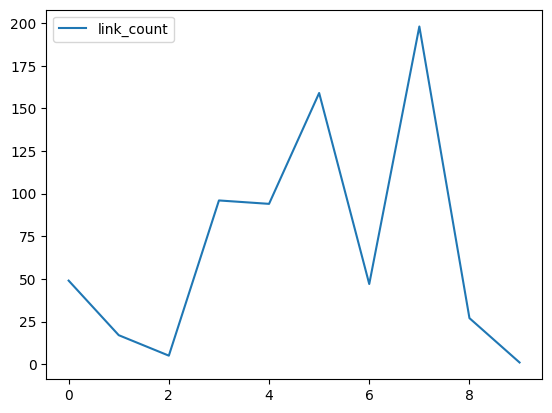

In [281]:
scrapes[['link_count']].plot();

In [282]:
job_links = scrapes.sample()['job_links'].iloc[0]
job_links

['https://jobs.smartrecruiters.com/PriviaHealth/743999949479403-sales-operations-associate-arlington-va',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999944030773-national-training-associate',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999944029203-sales-director',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999949560653-rvp-practice-operations-privia-health-north-carolina',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999948456643-associate-growth-director',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999949882123-implementation-training-associate',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999947190464-outside-sales-representative',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999948924725-nurse-care-manager',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999949882413-operations-consultant-ii',
 'https://jobs.smartrecruiters.com/PriviaHealth/743999949880523-coding-analyst',
 'https://jobs.smartrecruiters.com/PriviaHealth/74399994

In [287]:
def link_thing(row):
    for y in row['job_links']:
        print(y)
    print()

scrapes.apply(link_thing, axis=1)

https://boards.greenhouse.io/udacity/jobs/6863347002
https://boards.greenhouse.io/udacity/jobs/7037447002
https://boards.greenhouse.io/udacity/jobs/7005834002
https://boards.greenhouse.io/udacity/jobs/7005792002
https://boards.greenhouse.io/udacity/jobs/7001991002
https://boards.greenhouse.io/udacity/jobs/7024582002
https://boards.greenhouse.io/udacity/jobs/6945947002
https://boards.greenhouse.io/udacity/jobs/6864635002
https://boards.greenhouse.io/udacity/jobs/6864679002
https://boards.greenhouse.io/udacity/jobs/6407900002
https://boards.greenhouse.io/udacity/jobs/6402275002
https://boards.greenhouse.io/udacity/jobs/6858767002
https://boards.greenhouse.io/udacity/jobs/6858772002
https://boards.greenhouse.io/udacity/jobs/6228533002
https://boards.greenhouse.io/udacity/jobs/6400308002
https://boards.greenhouse.io/udacity/jobs/6402608002
https://boards.greenhouse.io/udacity/jobs/6908424002
https://boards.greenhouse.io/udacity/jobs/6918575002
https://boards.greenhouse.io/udacity/jobs/6851

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
dtype: object

In [293]:
for i, row in scrapes.iterrows():
    print(row)
    job_links = row['job_links']
    for y in job_links:
        print(y)
    print()

company_page_scrape_id                                                 9607
started_at                                       2023-12-08 15:27:27.358968
finished_at                                      2023-12-08 15:27:27.790149
company_id                                                              249
company_name                                                        Udacity
processed                                                             False
website_type                                                     Greenhouse
website_url                            https://boards.greenhouse.io/udacity
page_content              <!DOCTYPE html>\n<html lang="en">\n<head prefi...
job_links                 [https://boards.greenhouse.io/udacity/jobs/686...
link_count                                                               49
Name: 0, dtype: object

company_page_scrape_id                                                 9608
started_at                                       2023-12-08 15:2

In [294]:
import pandas as pd

data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [[7, 8], [9, 10, 11], [12, 13]]
}

df = pd.DataFrame(data)

# Explode the DataFrame based on the list column 'C'
exploded_df = df.assign(C=df['C']).explode('C')

# Duplicate scalar values in columns 'A' and 'B' across new rows
result = pd.concat([exploded_df.reset_index(drop=True), df[['A', 'B']].loc[df.index.repeat(df['C'].apply(len))].reset_index(drop=True)], axis=1)


In [295]:
exploded_df

,A,B,C
0,1,4,7
0,1,4,8
1,2,5,9
1,2,5,10
1,2,5,11
2,3,6,12
2,3,6,13


In [296]:
result

,A,B,C,A,B
0,1,4,7,1,4
1,1,4,8,1,4
2,2,5,9,2,5
3,2,5,10,2,5
4,2,5,11,2,5
5,3,6,12,3,6
6,3,6,13,3,6


In [298]:
scrapes.explode('job_links')

,company_page_scrape_id,started_at,finished_at,company_id,company_name,processed,website_type,website_url,page_content,job_links,link_count
0,9607,2023-12-08 15:27:27.358968,2023-12-08 15:27:27.790149,249,Udacity,False,Greenhouse,https://boards.greenhouse.io/udacity,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/udacity/jobs/6863...,49
0,9607,2023-12-08 15:27:27.358968,2023-12-08 15:27:27.790149,249,Udacity,False,Greenhouse,https://boards.greenhouse.io/udacity,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/udacity/jobs/7037...,49
0,9607,2023-12-08 15:27:27.358968,2023-12-08 15:27:27.790149,249,Udacity,False,Greenhouse,https://boards.greenhouse.io/udacity,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/udacity/jobs/7005...,49
0,9607,2023-12-08 15:27:27.358968,2023-12-08 15:27:27.790149,249,Udacity,False,Greenhouse,https://boards.greenhouse.io/udacity,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/udacity/jobs/7005...,49
0,9607,2023-12-08 15:27:27.358968,2023-12-08 15:27:27.790149,249,Udacity,False,Greenhouse,https://boards.greenhouse.io/udacity,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/udacity/jobs/7001...,49
...,...,...,...,...,...,...,...,...,...,...,...
8,9615,2023-12-08 15:28:38.799467,2023-12-08 15:28:39.211095,395,Sentry,False,Greenhouse,https://boards.greenhouse.io/sentry,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/sentry/jobs/5514798,27
8,9615,2023-12-08 15:28:38.799467,2023-12-08 15:28:39.211095,395,Sentry,False,Greenhouse,https://boards.greenhouse.io/sentry,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/sentry/jobs/5514797,27
8,9615,2023-12-08 15:28:38.799467,2023-12-08 15:28:39.211095,395,Sentry,False,Greenhouse,https://boards.greenhouse.io/sentry,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/sentry/jobs/5514801,27
8,9615,2023-12-08 15:28:38.799467,2023-12-08 15:28:39.211095,395,Sentry,False,Greenhouse,https://boards.greenhouse.io/sentry,"<!DOCTYPE html>\n<html lang=""en"">\n<head prefi...",https://boards.greenhouse.io/sentry/jobs/5520026,27


In [308]:
import pandas as pd

# Creating a named Series
data = pd.Series({
    'A': 1,
    'B': 2,
    'C': [3, 4]
})

# Transpose the Series into a DataFrame
pd.DataFrame(data).T.explode('C').values.flatten().tolist()

[1, 2, 3, 1, 2, 4]

In [325]:
data_s = ['(' + ', '.join(['?'] * len(row)) + ')' for row in pd.DataFrame(data).T.explode('C').values]
', '.join(data_s)
#.itertuples(index=False))

'(?, ?, ?), (?, ?, ?)'

In [252]:
samp = scrapes.sample().iloc[0]
website_url = samp['website_url']

url_base = website_url.strip('/').split('/')[-1] + '/'
print(url_base)
# job_links = [lk for lk in samp['job_links'] if 'gh_jid' in lk]
job_links = [lk for lk in samp['job_links'] if (url_base in lk or 'gh_jid' in lk) and 'oneclick-ui' not in lk]
job_links = ['https://boards.greenhouse.io'+lk if lk.lstrip('/').startswith(url_base) else lk for lk in job_links]

job_links = [lk for lk in samp['job_links'] if (url_base in lk or 'gh_jid' in lk) and 'oneclick-ui' not in lk]
job_links = ['https://boards.greenhouse.io'+lk if lk.lstrip('/').startswith(url_base) else lk for lk in job_links]

job_links

firstglobalmanagementservicesinc/


['https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4123434007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4162954007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4147152007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4162992007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4149274007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4120436007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4147879007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4120428007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4072212007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4086118007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4077231007',
 'https://boards.greenhouse.io/firstglobalmanagementservicesinc/jobs/4103742007',
 'https://boards

In [72]:
soup = BeautifulSoup(page_content, 'html.parser')
job_links = soup.find_all('a', href=lambda href: href and ('jobs' in href))
job_links

[<a data-mapped="true" href="/paltaltd/jobs/5024622004">Tax Manager (US and WW)</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5026872004">Customer Support Lead, Prisma/Lensa</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5026871004">Customer Support Lead, Prisma/Lensa</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5021236004">Growth Designer</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5003437004">Senior Content &amp; CRM Designer</a>,
 <a data-mapped="true" href="/paltaltd/jobs/4140812004">Senior Product Designer</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5003517004">Senior Go Developer </a>,
 <a data-mapped="true" href="/paltaltd/jobs/4993355004">Senior Software Engineer (Python)</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5015356004">HR Business Partner</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5019309004">Senior Growth Manager (Web Funnel)</a>,
 <a data-mapped="true" href="/paltaltd/jobs/5007672004">User Acquisition Manager (Google Ads)</a>,
 <a data-ma

In [71]:
job_links[0]['href']

'/paltaltd/jobs/5024622004'

In [105]:
scrapes['link_count'].astype(bool).mean()

# fraction of company pages where I successfully found job links

0.9109815354713314